# Quiz 4 - 07 de noviembre de 2018

## Nombres: John Alexis Munera - Johan Smith Agudelo


Desarrolla una simulación de un sistema dinámico, similar más no igual al de clase, definido por una ecuación diferencial de al menos de segundo orden (¡puede ser mayor!) solucionada a través de: Euler y Runge - Kutta 4. Realiza la comparación de la solución obtenida a través de ambos métodos y concluye al respecto. Esta actividad la puedes realizar en parejas. 

### Oscilador armonico
$$\frac{d^2x}{dt^2} + w_{0}^2x= 0$$
$$\frac{d^2x}{dt^2} = -w_{0}^2x   \quad (1)$$
$$w_{0}^2= \frac{k}{m}$$


Solucion de la EDO

$$x = Asin(w_{0}t + \theta)$$
$$v= \frac{dx}{dt} = Aw_{0}cos(w_{0}t + \theta)$$

1. Frecuencia angular $w_{0}$

In [5]:
% matplotlib nbagg 
#este comando se considera como una línea mágina, y sirve para la construcción de gráficas interactivas
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería para graficar
import matplotlib.animation as animation #librería para animaciones
plt.style.use('ggplot') #este es un estilo de gráfico diferente al usual

Traceback (most recent call last):
  File "c:\users\alexi\envs\metodos\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "c:\users\alexi\envs\metodos\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "c:\users\alexi\envs\metodos\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [6]:
#inicializamos todas las variables
dim  = 2    # dimensiones del sistema (x,y)
conteo_t = 1000 # number de pasos
X    = np.zeros(dim) # posición de la partícula
V    = np.zeros(dim) # velocidad de la partícula
Xs   = np.zeros([dim, conteo_t]) # posición de la partícula en cada instante de tiempo
Vs   = np.zeros([dim, conteo_t]) # velocidad de la partícula en cada instante de tiempo
tiempo = np.zeros(conteo_t) # vector de tiempo

In [7]:
def funcion(x, v, t):  # Funcion para evaluar la funcion
    return -w0*w0*x

def iniciar(): # función para inicializar la animación
    particula.set_data([], []) #definimos un elemento de animación en blanco
    linea.set_data([], []) #definimos un elemento de animación en blanco
    titulo.set_text(r'')
    return particula, linea, titulo #retornamos la inicialización

def animar_euler(i):
    global X,V,F,Rs,Vs,tiempo,h #variables globales
    X = X + V * h 
    V = V + funcion(X,V,tiempo[i]) * h #solución por Euler (1)
    Xs[0:dim,i]=X #guardamos el valor para todo el tiempo
    Vs[0:dim,i]=V #guardamos el valor para todo el tiempo
    tiempo[i]=i*h #aumentamos el paso
    particula.set_data(X[0], X[1])  # creamos una partícula en la posición actual
    linea.set_data(Xs[0,0:i], Xs[1,0:i]) # Creamos la línea con la última pos
    titulo.set_text(r"$t = {0:.2f}$".format(i*h))
    return particula,linea,titulo

def animar_runge_kutta_4(i): # definimos la animación por el método de euler
    global X,V,F,Xs,Vs,tiempo,h #variables globales
    k1=h*V
    l1=h*funcion(X, V, tiempo[i])
    k2=h*(V+l1/2)
    l2=h*funcion(X+k1/2, V+l1/2, tiempo[i]+h/2)
    k3=h*(V+l2/2)
    l3=h*funcion(X+k2/2, V+l2/2, tiempo[i]+h/2)
    k4=h*(V+l3)
    l4=h*funcion(X+k3, V+l3, tiempo[i]+h)
    X+=(k1+2*k2+2*k3+k4)/6
    V+=(l1+2*l2+2*l3+l4)/6  #Solucion usando runge kutta 4 para la ecuacion 1
    tiempo[i]=i*h
    
    Xs[0:dim,i]=X #guardamos el valor para todo el tiempo
    Vs[0:dim,i]=V #guardamos el valor para todo el tiempo
    tiempo[i]=i*h #aumentamos el paso
    particula.set_data(X[0], X[1])  # creamos una partícula en la posición actual
    linea.set_data(Xs[0,0:i], Xs[1,0:i]) # Creamos la línea con la última pos
    titulo.set_text(r"$t = {0:.2f}$".format(i*h))
    return particula,linea,titulo

<IPython.core.display.Javascript object>


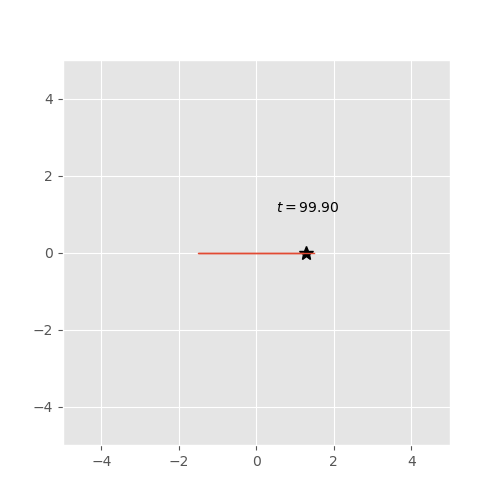

In [8]:
# establecemos las condiciones iniciales
X[0], X[1] = 1.5, 0. # Rx(0), Ry(0)
V[0], V[1] = 0., 0. # Vx(0), Vy(0)
area  = 10 # tamaño para el área de dibujo
h = 0.1 # paso
m = 1 # masa
k = 1 # constante
w0 = np.sqrt(k/m)
fig, ax = plt.subplots(figsize=(5,5)) # instanciamos la figura
ax = plt.axes(xlim=(-area/2,area/2),ylim=(-area/2,area/2)) # dibujamos el rango
particula, = ax.plot([],[],'k*', ms=10) # plot para la partícula

linea,=ax.plot([],[],lw=1) # plot para la trayectoria
titulo=ax.text(0.5,1.05,r'')
anim=animation.FuncAnimation(fig,animar_euler,init_func=iniciar,
     frames=conteo_t,interval=5,blit=True,repeat=False) # dibujamos la animacion usando el metodo seleccionado
# anim.save('movie.mp4',fps=20,dpi=400)